In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.image as mpimg
import calendar

In [2]:
sns.set_style("whitegrid")

In [3]:
bike = pd.read_csv("bikeshare_data.csv",
                   index_col = 0,
                   parse_dates = ["Start_day"])

C:\Users\Owner\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
bike.columns

Index(['Start_day', 'Start_hour', 'Arrivals', 'Departures', 'Diff',
       'Start_station_number', 'Start_station', 'Latitude', 'Longitude',
       'Capacity', 'Region_name', 'cumu_sum', 'percent_full', 'weekend_flag',
       'TAVG', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'Holiday'],
      dtype='object')

In [5]:
bike.isnull().sum()

Start_day                    0
Start_hour                   0
Arrivals                     0
Departures                   0
Diff                         0
Start_station_number         0
Start_station                0
Latitude                240095
Longitude               240095
Capacity                240095
Region_name             240095
cumu_sum                     0
percent_full            240095
weekend_flag                 0
TAVG                         0
TMAX                         0
TMIN                         0
PRCP                         0
SNOW                         0
Holiday                      0
dtype: int64

In [6]:
print(bike.shape)
bike.dropna(inplace = True)
bike.shape

(1786026, 20)


(1545931, 20)

In [7]:
## cleaning up names
bike.columns = ["_".join(col.split(" ")).lower() for col in bike.columns]
bike.columns

Index(['start_day', 'start_hour', 'arrivals', 'departures', 'diff',
       'start_station_number', 'start_station', 'latitude', 'longitude',
       'capacity', 'region_name', 'cumu_sum', 'percent_full', 'weekend_flag',
       'tavg', 'tmax', 'tmin', 'prcp', 'snow', 'holiday'],
      dtype='object')

In [8]:
bike.rename(columns = {"start_day":"date", "start_hour":"hour", "start_station":"station", "weekend_flag":"weekend"}, inplace = True)
bike['month'] = bike.date.dt.month
bike.columns

Index(['date', 'hour', 'arrivals', 'departures', 'diff',
       'start_station_number', 'station', 'latitude', 'longitude', 'capacity',
       'region_name', 'cumu_sum', 'percent_full', 'weekend', 'tavg', 'tmax',
       'tmin', 'prcp', 'snow', 'holiday', 'month'],
      dtype='object')

In [ ]:
# bike['year'] = bike['date'].dt.year.astype(str)
# bike['month'] = bike['date'].dt.month.astype(str)
# bike["day"] = bike['date'].dt.day.astype(str)
# bike['hour2'] = bike['hour'].astype(str)
# bike['timestamp'] = bike.iloc[:,-4:].agg('-'.join, axis = 1)
# bike['timestamp'] = pd.to_datetime(bike['timestamp'], format = '%Y-%m-%d-%H')
# bike.set_index("timestamp", inplace = True)
# bike = bike.iloc[:,:-4]
# bike.head()

In [9]:
bike['avg_avail'] = bike.percent_full.mul(100)
bike.head()

,date,hour,arrivals,departures,diff,start_station_number,station,latitude,longitude,capacity,...,percent_full,weekend,tavg,tmax,tmin,prcp,snow,holiday,month,avg_avail
0,2019-11-26,9,2.0,0.0,2.0,0,22nd & H St NW,38.898925,-77.048852,17.0,...,0.117647,0,48,62,38,0.00,0.0,False,11,11.764706
1,2019-11-27,9,1.0,0.0,1.0,0,22nd & H St NW,38.898925,-77.048852,17.0,...,0.176471,0,51,58,44,0.01,0.0,False,11,17.647059
2,2019-11-28,16,1.0,0.0,1.0,0,22nd & H St NW,38.898925,-77.048852,17.0,...,0.235294,0,50,54,43,0.00,0.0,True,11,23.529412
3,2019-11-30,23,1.0,0.0,1.0,0,22nd & H St NW,38.898925,-77.048852,17.0,...,0.294118,1,43,46,41,0.00,0.0,False,11,29.411765
4,2019-12-01,16,0.0,1.0,-1.0,0,22nd & H St NW,38.898925,-77.048852,17.0,...,0.235294,1,43,46,40,0.50,0.0,False,12,23.529412


In [10]:
## univariate EDA
bike[["avg_avail", "tavg", "tmax", "tmin", "prcp", "snow"]].describe().round(2)

,avg_avail,tavg,tmax,tmin,prcp,snow
count,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00
mean,45.38,62.74,71.86,54.66,0.10,0.02
std,25.68,16.46,17.56,16.16,0.29,0.23
min,0.00,16.00,24.00,10.00,0.00,0.00
25%,26.32,48.00,56.00,39.00,0.00,0.00
50%,45.16,67.00,76.00,58.00,0.00,0.00
75%,63.64,78.00,87.00,70.00,0.02,0.00
max,100.00,91.00,99.00,81.00,3.44,8.30


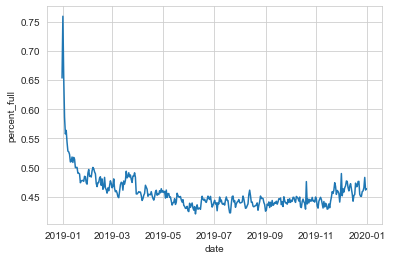

In [12]:
sns.lineplot(y = bike.groupby(['date'])['percent_full'].mean(),
             x= bike.groupby(['date'])['percent_full'].mean().index)
plt.show()

In [13]:
temp = bike.groupby(['month'])['percent_full'].mean()
temp = pd.DataFrame(temp)
temp['percent_full'] = temp.percent_full.mul(100)
#temp = temp.percent_full
temp.head()

,percent_full
month,
1,52.047735
2,47.764249
3,47.286662
4,45.545684
5,44.508725


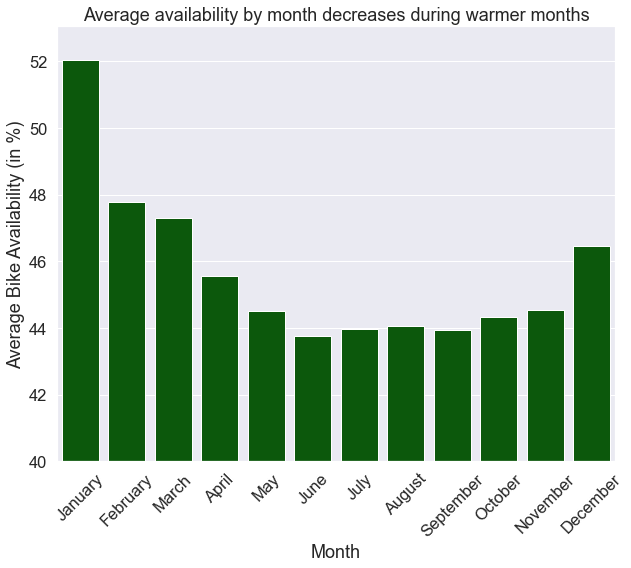

In [14]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(10,8))
ax = sns.barplot(y = "percent_full", x= temp.index, data = temp, color = 'darkgreen')
plt.ylim(40, temp.percent_full.max() + 1)
ax.set_ylabel("Average Bike Availability (in %)")
ax.set_xlabel("Month")
ax.set_xticklabels(list(calendar.month_name)[1:], rotation = 45)
ax.set_title('Average availability by month decreases during warmer months')
plt.show()

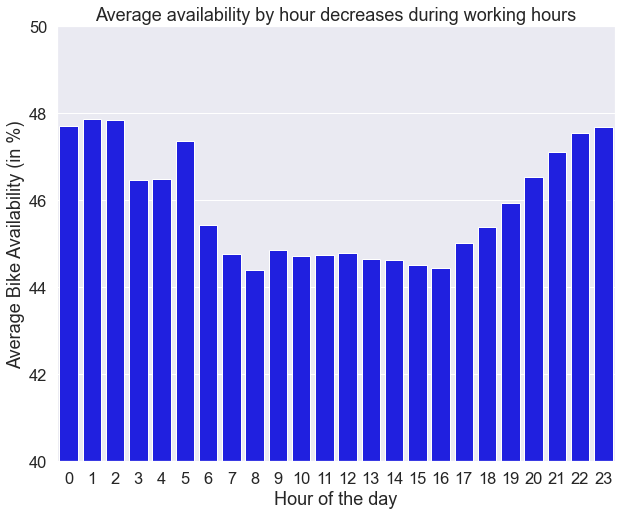

In [15]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(10,8))
ax = sns.barplot(y = "avg_avail", x = "hour", data = bike, ci = False, color = 'blue')
ax.set_ylim([40, 50])
ax.set_ylabel("Average Bike Availability (in %)")
ax.set_xlabel("Hour of the day")
#ax.set_xticklabels(list(calendar.month_name)[1:], rotation = 45)
ax.set_title('Average availability by hour decreases during working hours')
plt.show()

In [17]:
bike['In_DC'] = bike.region_name.apply(lambda x: True if x == "Washington, DC" else False)
bike.head()

,date,hour,arrivals,departures,diff,start_station_number,station,latitude,longitude,capacity,...,weekend,tavg,tmax,tmin,prcp,snow,holiday,month,avg_avail,In_DC
0,2019-11-26,9,2.0,0.0,2.0,0,22nd & H St NW,38.898925,-77.048852,17.0,...,0,48,62,38,0.00,0.0,False,11,11.764706,True
1,2019-11-27,9,1.0,0.0,1.0,0,22nd & H St NW,38.898925,-77.048852,17.0,...,0,51,58,44,0.01,0.0,False,11,17.647059,True
2,2019-11-28,16,1.0,0.0,1.0,0,22nd & H St NW,38.898925,-77.048852,17.0,...,0,50,54,43,0.00,0.0,True,11,23.529412,True
3,2019-11-30,23,1.0,0.0,1.0,0,22nd & H St NW,38.898925,-77.048852,17.0,...,1,43,46,41,0.00,0.0,False,11,29.411765,True
4,2019-12-01,16,0.0,1.0,-1.0,0,22nd & H St NW,38.898925,-77.048852,17.0,...,1,43,46,40,0.50,0.0,False,12,23.529412,True


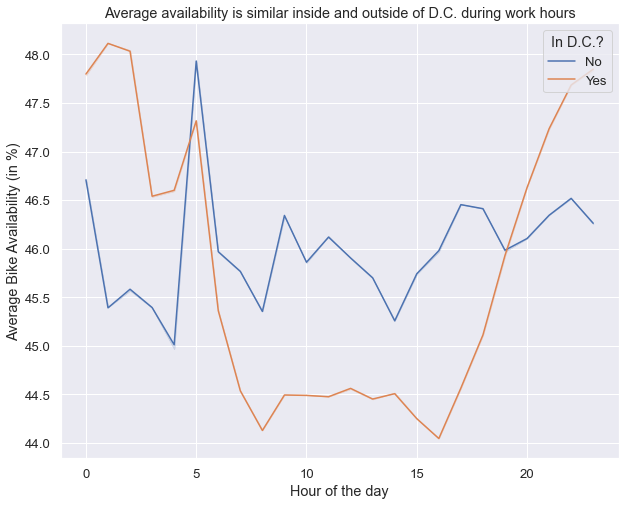

In [20]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(10,8))
ax = sns.lineplot(x = 'hour', y = 'avg_avail', data = bike, ci = False, hue = "In_DC", legend = False)
ax.set_title('Average availability is similar inside and outside of D.C. during work hours')
ax.set_ylabel("Average Bike Availability (in %)")
ax.set_xlabel("Hour of the day")
#ax.set_ylim([40, 50])
plt.legend(title='In D.C.?', loc='upper right', labels=['No', 'Yes'])
plt.show()

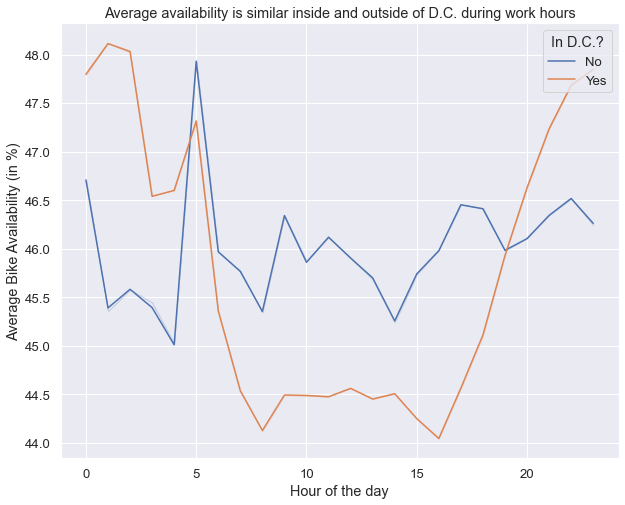

In [27]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(10,8))
ax1 = sns.lineplot(x = 'hour', y = 'avg_avail', data = bike, ci = False, hue = "In_DC", legend = False)
ax1.set_title('Average availability is similar inside and outside of D.C. during work hours')
ax1.set_ylabel("Average Bike Availability (in %)")
ax1.set_xlabel("Hour of the day")
plt.legend(title='In D.C.?', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [32]:
bike.columns

Index(['date', 'hour', 'arrivals', 'departures', 'diff',
       'start_station_number', 'station', 'latitude', 'longitude', 'capacity',
       'region_name', 'cumu_sum', 'percent_full', 'weekend', 'tavg', 'tmax',
       'tmin', 'prcp', 'snow', 'holiday', 'month', 'avg_avail', 'In_DC'],
      dtype='object')

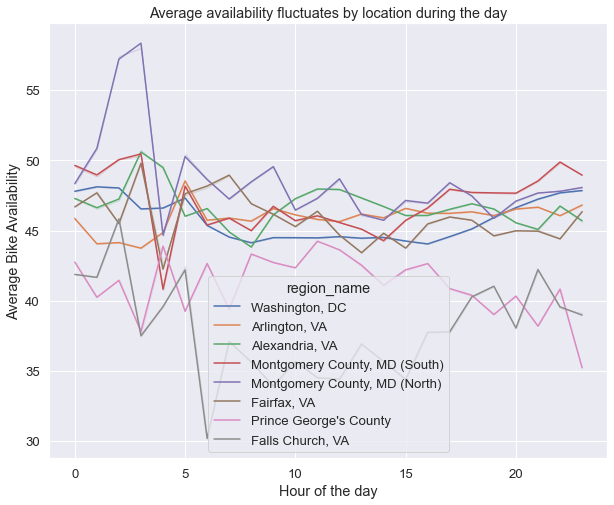

In [33]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(10,8))
ax = sns.lineplot(x = 'hour', y = 'avg_avail', data = bike, ci = False, hue = "region_name")
ax.set_title('Average availability fluctuates by location during the day')
ax.set_ylabel("Average Bike Availability")
ax.set_xlabel("Hour of the day")
plt.show()

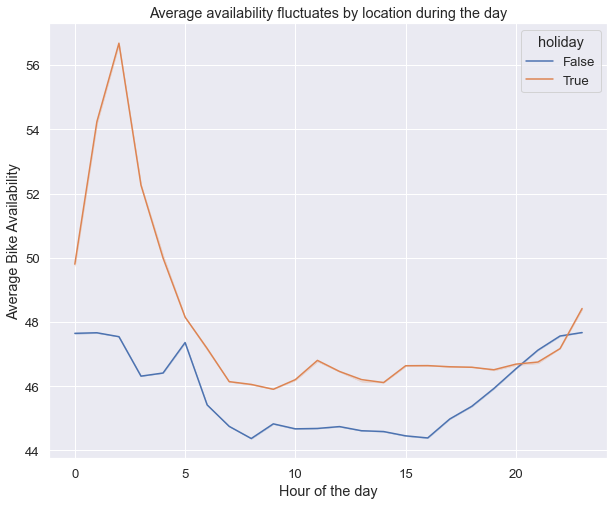

In [28]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(10,8))
ax = sns.lineplot(x = 'hour', y = 'avg_avail', data = bike, ci = False, hue = "holiday")
ax.set_title('Average availability fluctuates by location during the day')
ax.set_ylabel("Average Bike Availability")
ax.set_xlabel("Hour of the day")
plt.show()

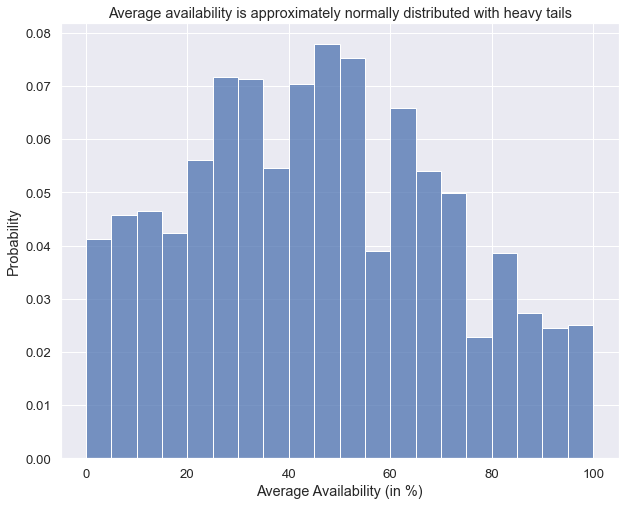

In [56]:
sns.set(font_scale = 1.2)
sns.color_palette("hls")
plt.figure(figsize=(10,8))
ax = sns.histplot(x = "avg_avail", data = bike, bins = 20, stat = "probability")
ax.set_xlabel("Average Availability (in %)")
ax.set_title("Average availability is approximately normally distributed with heavy tails")
plt.show()

In [38]:
bike[["avg_avail", "capacity", "tavg", "tmax", "tmin", "prcp", "snow"]].describe().round(2)

,avg_avail,capacity,tavg,tmax,tmin,prcp,snow
count,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00
mean,45.38,19.62,62.74,71.86,54.66,0.10,0.02
std,25.68,6.42,16.46,17.56,16.16,0.29,0.23
min,0.00,9.00,16.00,24.00,10.00,0.00,0.00
25%,26.32,15.00,48.00,56.00,39.00,0.00,0.00
50%,45.16,19.00,67.00,76.00,58.00,0.00,0.00
75%,63.64,23.00,78.00,87.00,70.00,0.02,0.00
max,100.00,55.00,91.00,99.00,81.00,3.44,8.30


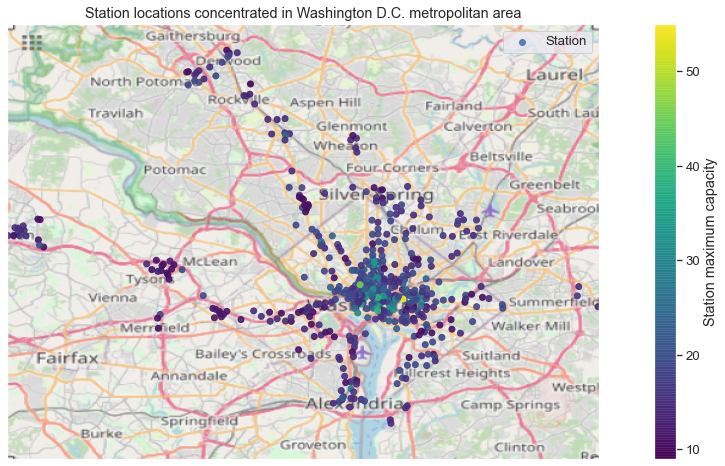

In [62]:
dc_img=mpimg.imread('unknown.png')
plt.figure(figsize=(20,8))
scatter = pd.DataFrame(bike.groupby('station')[["latitude", "longitude", 'percent_full', 'capacity']].mean())
ax = plt.scatter(x = "longitude", data = scatter, y = "latitude", c = "capacity", label = 'Station',
            cmap = plt.get_cmap("viridis"), alpha = 0.9)
plt.colorbar(ax, label ="Station maximum capacity")
plt.title('Station locations concentrated in Washington D.C. metropolitan area')
plt.legend()
plt.xlim(-77.369,-76.825)
# The range of y-axis is the range of latitude of this map.
plt.ylim(38.75,39.15)
# Overlap the scatterplot on top of the DC map.
plt.imshow(dc_img, alpha=0.9, extent=[-77.369, -76.825, 38.75, 39.15])
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.show()
#ax.savefig('pic.png')

In [43]:
bike.columns

Index(['date', 'hour', 'arrivals', 'departures', 'diff',
       'start_station_number', 'station', 'latitude', 'longitude', 'capacity',
       'region_name', 'cumu_sum', 'percent_full', 'weekend', 'tavg', 'tmax',
       'tmin', 'prcp', 'snow', 'holiday', 'month', 'avg_avail', 'In_DC'],
      dtype='object')

In [ ]:
bike.dtypes

In [44]:
## quantitative comparisons
quant = ["percent_full", 'arrivals', 'departures', "hour", "latitude", "longitude", "tavg", "tmax", "tmin", "prcp", "snow"]

In [45]:
bike[quant].corr()

,percent_full,arrivals,departures,hour,latitude,longitude,tavg,tmax,tmin,prcp,snow
percent_full,1.000000,0.149279,-0.076342,0.009431,0.025326,0.011005,-0.055119,-0.055238,-0.054760,-0.000195,0.012198
arrivals,0.149279,1.000000,0.588797,0.045269,-0.058682,0.080653,0.090364,0.094858,0.085493,-0.027719,-0.024842
departures,-0.076342,0.588797,1.000000,0.041369,-0.060961,0.083825,0.097078,0.101832,0.091573,-0.032280,-0.025650
hour,0.009431,0.045269,0.041369,1.000000,-0.002653,-0.002338,-0.002214,0.001229,-0.002282,-0.005868,-0.008283
latitude,0.025326,-0.058682,-0.060961,-0.002653,1.000000,-0.243247,0.000572,0.000081,0.000610,0.001524,-0.000357
longitude,0.011005,0.080653,0.083825,-0.002338,-0.243247,1.000000,-0.036270,-0.036610,-0.035191,0.008228,0.008933
tavg,-0.055119,0.090364,0.097078,-0.002214,0.000572,-0.036270,1.000000,0.976169,0.982706,0.030998,-0.125810
tmax,-0.055238,0.094858,0.101832,0.001229,0.000081,-0.036610,0.976169,1.000000,0.944786,0.002749,-0.143765
tmin,-0.054760,0.085493,0.091573,-0.002282,0.000610,-0.035191,0.982706,0.944786,1.000000,0.052281,-0.107468
prcp,-0.000195,-0.027719,-0.032280,-0.005868,0.001524,0.008228,0.030998,0.002749,0.052281,1.000000,0.069109


In [41]:
bike[quant].describe()

,percent_full,hour,latitude,longitude,tavg,tmax,tmin,prcp,snow
count,1.545931e+06,1.545931e+06,1.545931e+06,1.545931e+06,1.545931e+06,1.545931e+06,1.545931e+06,1.545931e+06,1.545931e+06
mean,4.538019e-01,1.338872e+01,3.890643e+01,-7.703673e+01,6.274224e+01,7.185926e+01,5.466415e+01,9.776225e-02,1.619018e-02
std,2.567762e-01,5.522827e+00,3.696535e-02,4.505497e-02,1.646268e+01,1.755995e+01,1.615606e+01,2.920260e-01,2.339436e-01
min,0.000000e+00,0.000000e+00,3.878263e+01,-7.736842e+01,1.600000e+01,2.400000e+01,1.000000e+01,0.000000e+00,0.000000e+00
25%,2.631579e-01,9.000000e+00,3.889050e+01,-7.704923e+01,4.800000e+01,5.600000e+01,3.900000e+01,0.000000e+00,0.000000e+00
50%,4.516129e-01,1.400000e+01,3.890267e+01,-7.703201e+01,6.700000e+01,7.600000e+01,5.800000e+01,0.000000e+00,0.000000e+00
75%,6.363636e-01,1.800000e+01,3.891815e+01,-7.701246e+01,7.800000e+01,8.700000e+01,7.000000e+01,2.000000e-02,0.000000e+00
max,1.000000e+00,2.300000e+01,3.912583e+01,-7.682554e+01,9.100000e+01,9.900000e+01,8.100000e+01,3.440000e+00,8.300000e+00


In [42]:
bike[quant].latitude.min()

38.782633

In [ ]:
bike[quant].latitude.max()

In [ ]:
bike[quant].longitude.min()

In [ ]:
bike[quant].longitude.max()

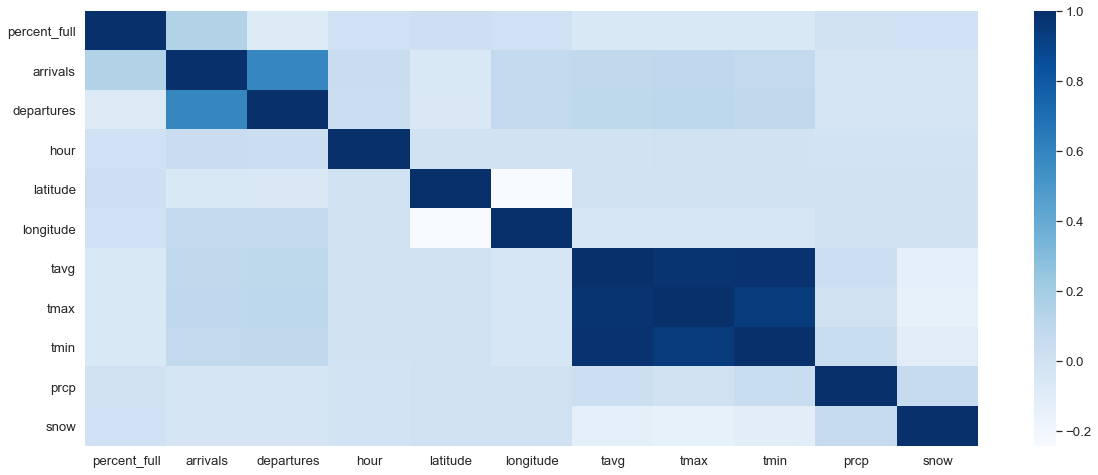

In [46]:
plt.figure(figsize=(20,8))
cmap = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(bike[quant].corr(), cmap = cmap)
plt.show()

In [47]:
bike[quant].corr().style.background_gradient(cmap='coolwarm')

,percent_full,arrivals,departures,hour,latitude,longitude,tavg,tmax,tmin,prcp,snow
percent_full,1.000000,0.149279,-0.076342,0.009431,0.025326,0.011005,-0.055119,-0.055238,-0.054760,-0.000195,0.012198
arrivals,0.149279,1.000000,0.588797,0.045269,-0.058682,0.080653,0.090364,0.094858,0.085493,-0.027719,-0.024842
departures,-0.076342,0.588797,1.000000,0.041369,-0.060961,0.083825,0.097078,0.101832,0.091573,-0.032280,-0.025650
hour,0.009431,0.045269,0.041369,1.000000,-0.002653,-0.002338,-0.002214,0.001229,-0.002282,-0.005868,-0.008283
latitude,0.025326,-0.058682,-0.060961,-0.002653,1.000000,-0.243247,0.000572,0.000081,0.000610,0.001524,-0.000357
longitude,0.011005,0.080653,0.083825,-0.002338,-0.243247,1.000000,-0.036270,-0.036610,-0.035191,0.008228,0.008933
tavg,-0.055119,0.090364,0.097078,-0.002214,0.000572,-0.036270,1.000000,0.976169,0.982706,0.030998,-0.125810
tmax,-0.055238,0.094858,0.101832,0.001229,0.000081,-0.036610,0.976169,1.000000,0.944786,0.002749,-0.143765
tmin,-0.054760,0.085493,0.091573,-0.002282,0.000610,-0.035191,0.982706,0.944786,1.000000,0.052281,-0.107468
prcp,-0.000195,-0.027719,-0.032280,-0.005868,0.001524,0.008228,0.030998,0.002749,0.052281,1.000000,0.069109


In [52]:
bike.describe().round(2)

,hour,arrivals,departures,diff,start_station_number,latitude,longitude,capacity,cumu_sum,percent_full,tavg,tmax,tmin,prcp,snow,month,avg_avail
count,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00,1545931.00
mean,13.39,2.20,2.19,0.01,31392.60,38.91,-77.04,19.62,8.81,0.45,62.74,71.86,54.66,0.10,0.02,6.68,45.38
std,5.52,3.05,2.93,2.71,550.71,0.04,0.05,6.42,5.76,0.26,16.46,17.56,16.16,0.29,0.23,3.22,25.68
min,0.00,0.00,0.00,-61.00,0.00,38.78,-77.37,9.00,0.00,0.00,16.00,24.00,10.00,0.00,0.00,1.00,0.00
25%,9.00,1.00,1.00,-1.00,31217.00,38.89,-77.05,15.00,5.00,0.26,48.00,56.00,39.00,0.00,0.00,4.00,26.32
50%,14.00,1.00,1.00,0.00,31288.00,38.90,-77.03,19.00,8.00,0.45,67.00,76.00,58.00,0.00,0.00,7.00,45.16
75%,18.00,3.00,3.00,1.00,31614.00,38.92,-77.01,23.00,12.00,0.64,78.00,87.00,70.00,0.02,0.00,9.00,63.64
max,23.00,560.00,75.00,560.00,32609.00,39.13,-76.83,55.00,55.00,1.00,91.00,99.00,81.00,3.44,8.30,12.00,100.00


In [ ]:
sns.set(font_scale = 1.2)
sns.color_palette("hls")
plt.figure(figsize=(10,8))
ax = sns.histplot(x = "departures", data = bike, bins = 10, stat = "probability")
ax.set_xlabel("Average Availability (in %)")
ax.set_title("Average availability is approximately normally distributed with heavy tails")
plt.show()